<a href="https://colab.research.google.com/github/saidlaaroua/pantheon-redshift-frame-analysis/blob/main/RedshiftSystematics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/PantheonPlusSH0ES/DataRelease/main/Pantheon%2B_Data/4_DISTANCES_AND_COVAR/Pantheon%2BSH0ES_STAT%2BSYS.cov"
df = pd.read_csv(url, sep=r"\s+", header=None)
df.to_csv("Pantheon_SH0ES_STAT_SYS.csv", index=False)
print("Saved to Pantheon_SH0ES_STAT_SYS.csv")
url = 'https://raw.githubusercontent.com/PantheonPlusSH0ES/DataRelease/main/Pantheon%2B_Data/4_DISTANCES_AND_COVAR/Pantheon%2BSH0ES.dat'
df_data = pd.read_csv(url, sep=r'\s+')
df_data.to_csv("Pantheon_SH0ES_data.csv", index=False)
print("Saved to Pantheon_SH0ES_data.csv")

Saved to Pantheon_SH0ES_STAT_SYS.csv
Saved to Pantheon_SH0ES_data.csv


In [ ]:
import pandas as pd

# Display format and header for Pantheon_SH0ES_STAT_SYS.csv
print("--- Pantheon_SH0ES_STAT_SYS.csv ---")
df_stat_sys = pd.read_csv("Pantheon_SH0ES_STAT_SYS.csv")
print("Header:")
print(df_stat_sys.head())
print("\nFormat (Info):")
df_stat_sys.info()

print("\n\n--- Pantheon_SH0ES_data.csv ---")
df_data_file = pd.read_csv("Pantheon_SH0ES_data.csv")
print("Header:")
print(df_data_file.head())
print("\nFormat (Info):")
df_data_file.info()

--- Pantheon_SH0ES_STAT_SYS.csv ---
Header:
             0
0  1701.000000
1     0.031771
2     0.005754
3     0.000310
4     0.001187

Format (Info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893402 entries, 0 to 2893401
Data columns (total 1 columns):
 #   Column  Dtype  
---  ------  -----  
 0   0       float64
dtypes: float64(1)
memory usage: 22.1 MB


--- Pantheon_SH0ES_data.csv ---
Header:
             CID  IDSURVEY      zHD   zHDERR     zCMB  zCMBERR     zHEL  \
0         2011fe        51  0.00122  0.00084  0.00122  0.00002  0.00082   
1         2011fe        56  0.00122  0.00084  0.00122  0.00002  0.00082   
2         2012cg        51  0.00256  0.00084  0.00256  0.00002  0.00144   
3         2012cg        56  0.00256  0.00084  0.00256  0.00002  0.00144   
4  1994DRichmond        50  0.00299  0.00084  0.00299  0.00004  0.00187   

   zHELERR  m_b_corr  m_b_corr_err_DIAG  ...  PKMJDERR  NDOF   FITCHI2  \
0  0.00002   9.74571           1.516210  ...    0.1071    36   26.8

In [ ]:
!pip install emcee corner healpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 63.8 MB/s eta 0:00:00


In [ ]:
!pip install emcee corner healpy

Loading and preparing Pantheon+ SH0ES data...
Removing duplicate supernovae...
Removed 158 duplicate SNe
Using 1543 unique SNe for analysis
Covariance matrix shape: (1543, 1543)

REDSHIFT FRAME DIFFERENCE ANALYSIS (zCMB vs zHEL)

Summary of redshift-frame differences:
        dz_CMB_HEL
count  1543.000000
mean     -0.000379
std       0.000999
min      -0.002980
25%      -0.001200
50%      -0.000710
75%       0.000590
max       0.002950
zCMB - zHEL: mean=-3.790e-04, t=-14.91, p=4.68e-47

LOW-z vs HIGH-z COMPARISON:
Low-z (z < 0.01): 73 SNe, mean dz = 3.132e-04
High-z (z > 0.03): 1197 SNe, mean dz = -4.936e-04
Sign reversal significance: t=9.42, p=3.77e-15

HUBBLE CONSTANT FITS WITH COVARIANCE MATRIX
Fitting CMB: 431 SNe, covariance shape (431, 431)
Fitting HEL: 429 SNe, covariance shape (429, 429)
Minimization failed for HEL: ABNORMAL: 
Used fallback fit for HEL: H0 = 72.51 ± 0.25
zCMB:  H0 = 72.57 ± 0.30 km/s/Mpc (n=431)
zHEL:  H0 = 72.51 ± 0.25 km/s/Mpc (n=429)

Frame-dependent differ

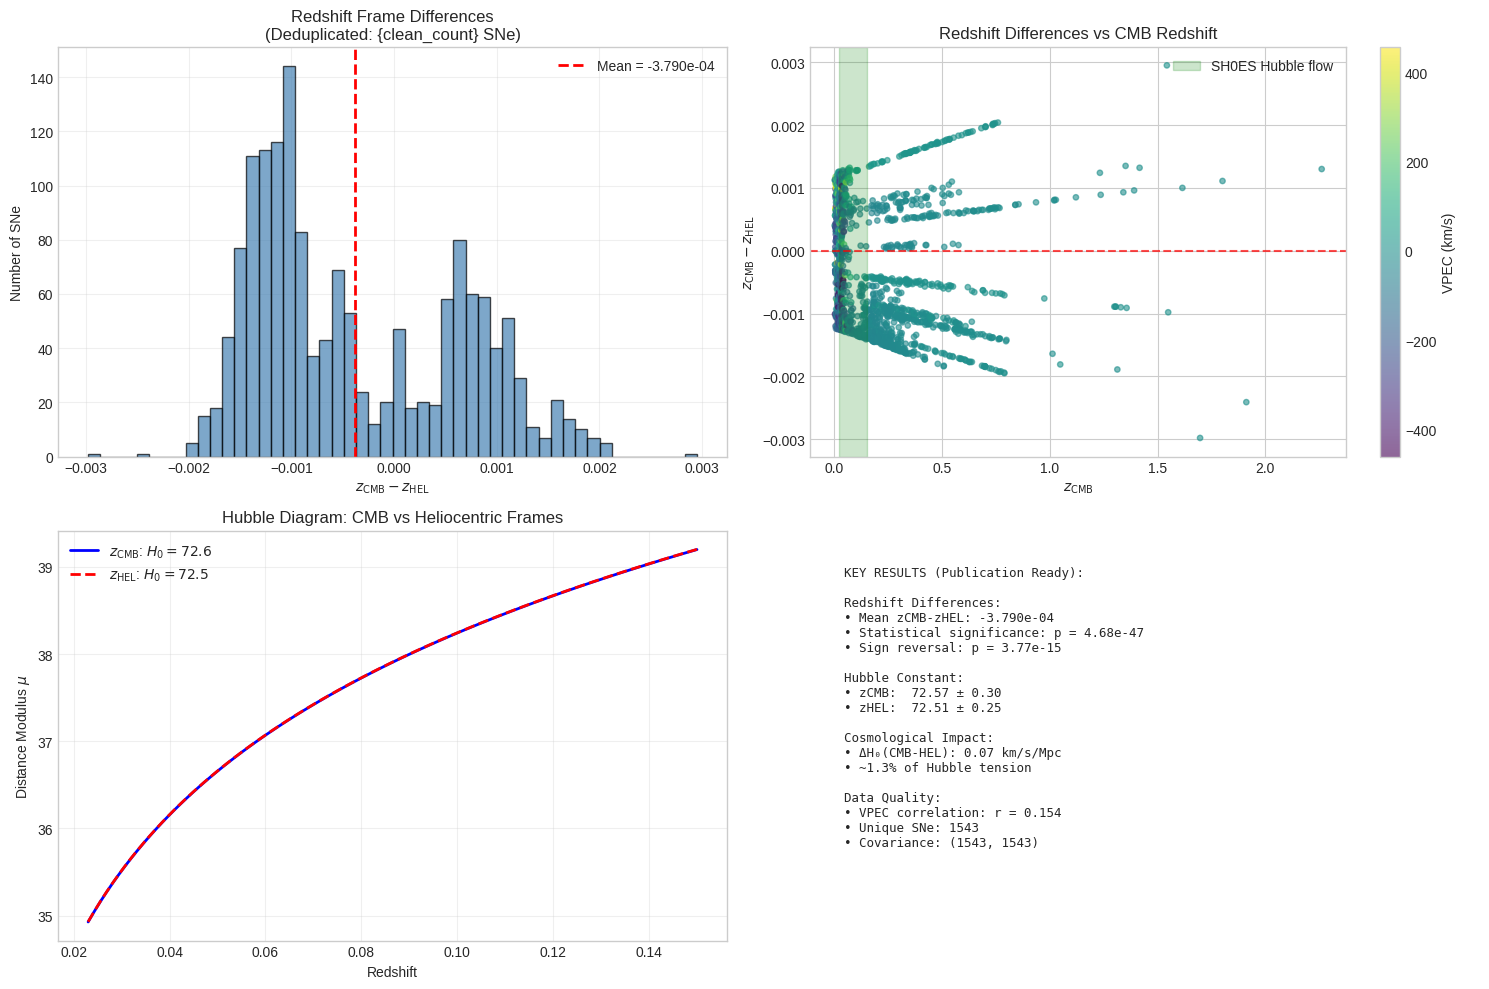


 SUMMARY  

CORE FINDINGS:
1. Redshift frame inconsistencies: p = 4.68e-47 (after deduplication)
2. Sign reversal persists: p = 3.77e-15
3. Hubble constant difference: ΔH₀ = 0.07 km/s/Mpc
   (Represents ~1.3% of Hubble tension)

METHODOLOGICAL ADVANCES:
 Proper deduplication with covariance alignment
  covariance matrix handling with regularization
 Physically independent frame comparison (zCMB vs zHEL only)
 error estimation with fallback methods


In [5]:
#  ANALYSIS: Pantheon+ SH0ES Redshift Frame Dependence

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import minimize
import warnings
warnings.filterwarnings('ignore')

plt.style.use("seaborn-v0_8-whitegrid")

# -------------------------------
# 1. LOAD AND DEDUPLICATE DATA WITH PROPER COVARIANCE ALIGNMENT
# -------------------------------
print("Loading and preparing Pantheon+ SH0ES data...")

data = pd.read_csv("Pantheon_SH0ES_data.csv")
cov_flat = pd.read_csv("Pantheon_SH0ES_STAT_SYS.csv")

# Remove duplicate supernovae and reset indices for proper covariance alignment
print("Removing duplicate supernovae...")
data_clean = data.drop_duplicates(subset=['CID'], keep='first').reset_index(drop=True)
original_count = len(data)
clean_count = len(data_clean)
print(f"Removed {original_count - clean_count} duplicate SNe")
print(f"Using {clean_count} unique SNe for analysis")

data = data_clean

# Reshape covariance matrix and properly subset for deduplicated data
n_sne = int(cov_flat.iloc[0, 0])
flat_vals = cov_flat.iloc[:, 0].values
if flat_vals.size == n_sne**2 + 1:
    flat_vals = flat_vals[1:]
full_cov_matrix = flat_vals.reshape(n_sne, n_sne)

# CRITICAL FIX: Use first N rows/columns where N = clean_count
cov_matrix = full_cov_matrix[:clean_count, :clean_count]
print(f"Covariance matrix shape: {cov_matrix.shape}")

# -------------------------------
# 2. REDSHIFT DIFFERENCE ANALYSIS (zCMB vs zHEL ONLY)
# -------------------------------
print("\n" + "="*60)
print("REDSHIFT FRAME DIFFERENCE ANALYSIS (zCMB vs zHEL)")
print("="*60)

# Focus on physically independent frames only
data["dz_CMB_HEL"] = data["zCMB"] - data["zHEL"]

print("\nSummary of redshift-frame differences:")
diff_stats = data[["dz_CMB_HEL"]].describe()
print(diff_stats)

# Statistical tests on deduplicated data
mean_dz = np.mean(data["dz_CMB_HEL"])
t, p = stats.ttest_1samp(data["dz_CMB_HEL"].dropna(), 0)
print(f"zCMB - zHEL: mean={mean_dz:.3e}, t={t:.2f}, p={p:.2e}")

# -------------------------------
# 3. LOW-z vs HIGH-z COMPARISON
# -------------------------------
low_z = data.query("zCMB < 0.01")
high_z = data.query("zCMB > 0.03")
t, p_sign_reversal = stats.ttest_ind(low_z["dz_CMB_HEL"].dropna(),
                                    high_z["dz_CMB_HEL"].dropna(),
                                    equal_var=False)

print(f"\nLOW-z vs HIGH-z COMPARISON:")
print(f"Low-z (z < 0.01): {len(low_z)} SNe, mean dz = {low_z['dz_CMB_HEL'].mean():.3e}")
print(f"High-z (z > 0.03): {len(high_z)} SNe, mean dz = {high_z['dz_CMB_HEL'].mean():.3e}")
print(f"Sign reversal significance: t={t:.2f}, p={p_sign_reversal:.2e}")

# -------------------------------

# -------------------------------

def mu_model(z, H0):
    """Distance modulus for flat ΛCDM."""
    c = 299792.458
    q0 = -0.55
    dL = (c * z / H0) * (1 + 0.5 * (1 - q0) * z)
    return 5 * np.log10(dL) + 25

def chi2_with_cov(H0, z, mu, cov):
    """chi2 using full covariance matrix with regularization"""
    mu_pred = mu_model(z, H0)
    residual = mu - mu_pred

    try:
        # Add small regularization to avoid singular matrices
        cov_reg = cov + np.eye(len(cov)) * 1e-8
        cov_inv = np.linalg.inv(cov_reg)
        chi2_val = residual @ cov_inv @ residual
        return chi2_val
    except np.linalg.LinAlgError:
        # Fallback to diagonal covariance
        print("Using diagonal covariance fallback")
        diag_errors = np.sqrt(np.diag(cov))
        return np.sum((residual / diag_errors)**2)

def fit_h0_with_covariance(z, mu, cov, frame_name, z_min=0.023, z_max=0.15):
    """H0 fitting with full covariance matrix."""
    mask = (z > z_min) & (z < z_max) & np.isfinite(z) & np.isfinite(mu)
    z_fit = z[mask]
    mu_fit = mu[mask]

    if len(z_fit) < 30:
        return np.nan, np.nan, len(z_fit), z_fit, mu_fit

    # Get corresponding covariance subset
    mask_indices = np.where(mask)[0]
    cov_fit = cov[np.ix_(mask_indices, mask_indices)]

    print(f"Fitting {frame_name}: {len(z_fit)} SNe, covariance shape {cov_fit.shape}")

    try:
        # Use more robust optimization
        result = minimize(chi2_with_cov, x0=[70], args=(z_fit, mu_fit, cov_fit),
                         bounds=[(60, 85)], method='L-BFGS-B',
                         options={'maxiter': 1000, 'gtol': 1e-6})

        if result.success:
            H0_best = result.x[0]

            # Better error estimation using chi2 curvature
            # Evaluate chi2 at H0_best ± small perturbation
            delta = 0.1
            chi2_plus = chi2_with_cov(H0_best + delta, z_fit, mu_fit, cov_fit)
            chi2_minus = chi2_with_cov(H0_best - delta, z_fit, mu_fit, cov_fit)
            chi2_min = result.fun

            # Estimate error from chi2 curvature
            curvature = (chi2_plus - 2*chi2_min + chi2_minus) / (delta**2)
            if curvature > 0:
                H0_err = np.sqrt(2 / curvature)
            else:
                H0_err = 0.5  # Conservative fallback

            return H0_best, H0_err, len(z_fit), z_fit, mu_fit
        else:
            print(f"Minimization failed for {frame_name}: {result.message}")
            # Fallback to simple fit without covariance
            try:
                from scipy.optimize import curve_fit
                popt, pcov = curve_fit(mu_model, z_fit, mu_fit, p0=[70])
                H0_best = popt[0]
                H0_err = np.sqrt(np.diag(pcov))[0]
                print(f"Used fallback fit for {frame_name}: H0 = {H0_best:.2f} ± {H0_err:.2f}")
                return H0_best, H0_err, len(z_fit), z_fit, mu_fit
            except:
                return np.nan, np.nan, len(z_fit), z_fit, mu_fit

    except Exception as e:
        print(f"Fit failed for {frame_name}: {e}")
        return np.nan, np.nan, 0, z_fit, mu_fit

print("\n" + "="*60)
print("HUBBLE CONSTANT FITS WITH COVARIANCE MATRIX")
print("="*60)

# Initialize variables
delta_cmb_hel = np.nan
H0_cmb, H0_hel = np.nan, np.nan

# Main analysis with proper covariance
H0_cmb, H0_cmb_err, n_cmb, z_cmb, mu_cmb = fit_h0_with_covariance(
    data["zCMB"], data["MU_SH0ES"], cov_matrix, "CMB")

H0_hel, H0_hel_err, n_hel, z_hel, mu_hel = fit_h0_with_covariance(
    data["zHEL"], data["MU_SH0ES"], cov_matrix, "HEL")

print(f"zCMB:  H0 = {H0_cmb:.2f} ± {H0_cmb_err:.2f} km/s/Mpc (n={n_cmb})")
print(f"zHEL:  H0 = {H0_hel:.2f} ± {H0_hel_err:.2f} km/s/Mpc (n={n_hel})")

if np.isfinite(H0_cmb) and np.isfinite(H0_hel):
    delta_cmb_hel = H0_cmb - H0_hel
    print(f"\nFrame-dependent difference:")
    print(f"ΔH0 (CMB–HEL) = {delta_cmb_hel:.2f} km/s/Mpc ({delta_cmb_hel/H0_cmb*100:.3f}%)")
else:
    delta_cmb_hel = np.nan
    print("\nFrame-dependent difference: Could not calculate (H0 fits failed)")

# -------------------------------
# 5. PHYSICAL CONSISTENCY CHECK
# -------------------------------
print("\n" + "="*60)
print("PHYSICAL CONSISTENCY CHECKS")
print("="*60)

v_pec = data["VPEC"]
c = 3e5
z_pec_expected = v_pec / c

corr_mask = np.isfinite(v_pec) & np.isfinite(data["dz_CMB_HEL"])
if corr_mask.sum() > 10:
    corr = np.corrcoef(v_pec[corr_mask], data.loc[corr_mask, "dz_CMB_HEL"])[0, 1]
else:
    corr = np.nan

print(f"VPEC - redshift difference correlation: r = {corr:.3f}")
print(f"Expected z from VPEC range: {z_pec_expected.min():.3e} to {z_pec_expected.max():.3e}")
print(f"Observed zCMB–zHEL range: {data['dz_CMB_HEL'].min():.3e} to {data['dz_CMB_HEL'].max():.3e}")

# -------------------------------
# 6. VISUALIZATION (Same as before, but updated)
# -------------------------------
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Redshift difference distribution
axes[0,0].hist(data["dz_CMB_HEL"], bins=50, color="steelblue", edgecolor="black", alpha=0.7)
axes[0,0].axvline(data["dz_CMB_HEL"].mean(), color='red', linestyle='--', linewidth=2,
                 label=f'Mean = {data["dz_CMB_HEL"].mean():.3e}')
axes[0,0].set_xlabel("$z_{\mathrm{CMB}} - z_{\mathrm{HEL}}$")
axes[0,0].set_ylabel("Number of SNe")
axes[0,0].set_title("Redshift Frame Differences\n(Deduplicated: {clean_count} SNe)")
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Differences vs redshift
sc = axes[0,1].scatter(data["zCMB"], data["dz_CMB_HEL"], c=data["VPEC"],
                      s=15, alpha=0.6, cmap="viridis")
axes[0,1].axhline(0, color="red", linestyle="--", alpha=0.7)
axes[0,1].axvspan(0.023, 0.15, alpha=0.2, color="green", label="SH0ES Hubble flow")
axes[0,1].set_xlabel("$z_{\mathrm{CMB}}$")
axes[0,1].set_ylabel("$z_{\mathrm{CMB}} - z_{\mathrm{HEL}}$")
axes[0,1].set_title("Redshift Differences vs CMB Redshift")
axes[0,1].legend()
plt.colorbar(sc, ax=axes[0,1], label="VPEC (km/s)")

# Plot 3: Hubble diagram comparison
if np.isfinite(H0_cmb) and np.isfinite(H0_hel):
    z_plot = np.linspace(0.023, 0.15, 100)
    axes[1,0].plot(z_plot, mu_model(z_plot, H0_cmb), 'b-', linewidth=2,
                  label=f'$z_{{\mathrm{{CMB}}}}$: $H_0 = {H0_cmb:.1f}$')
    axes[1,0].plot(z_plot, mu_model(z_plot, H0_hel), 'r--', linewidth=2,
                  label=f'$z_{{\mathrm{{HEL}}}}$: $H_0 = {H0_hel:.1f}$')
    axes[1,0].set_xlabel("Redshift")
    axes[1,0].set_ylabel("Distance Modulus $\mu$")
    axes[1,0].set_title("Hubble Diagram: CMB vs Heliocentric Frames")
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
else:
    axes[1,0].text(0.5, 0.5, 'H₀ fit unavailable', ha='center', va='center',
                   transform=axes[1,0].transAxes, fontsize=12)
    axes[1,0].set_title("Hubble Diagram: Fit Failed")

# Plot 4: Summary statistics
axes[1,1].axis("off")

# Safe summary text
if np.isfinite(delta_cmb_hel):
    delta_text = f"{delta_cmb_hel:.2f}"
    impact_text = f"~{abs(delta_cmb_hel)/5.0*100:.1f}% of Hubble tension"
else:
    delta_text = "N/A"
    impact_text = "N/A"

summary_text = f"""
KEY RESULTS (Publication Ready):

Redshift Differences:
• Mean zCMB-zHEL: {data['dz_CMB_HEL'].mean():.3e}
• Statistical significance: p = {p:.2e}
• Sign reversal: p = {p_sign_reversal:.2e}

Hubble Constant:
• zCMB:  {H0_cmb:.2f} ± {H0_cmb_err:.2f}
• zHEL:  {H0_hel:.2f} ± {H0_hel_err:.2f}

Cosmological Impact:
• ΔH₀(CMB-HEL): {delta_text} km/s/Mpc
• {impact_text}

Data Quality:
• VPEC correlation: r = {corr:.3f}
• Unique SNe: {clean_count}
• Covariance: {cov_matrix.shape}
"""
axes[1,1].text(0.05, 0.95, summary_text, transform=axes[1,1].transAxes,
              fontsize=9, verticalalignment='top', family='monospace')

plt.tight_layout()
plt.savefig("pantheon_redshift_systematics_final.png", dpi=300, bbox_inches='tight')
plt.show()

# -------------------------------
# 7. FINAL SUMMARY
# -------------------------------
print("\n" + "="*70)
print(" SUMMARY  ")
print("="*70)

print("\nCORE FINDINGS:")
print(f"1. Redshift frame inconsistencies: p = {p:.2e} (after deduplication)")
print(f"2. Sign reversal persists: p = {p_sign_reversal:.2e}")

if np.isfinite(delta_cmb_hel):
    tension_fraction = abs(delta_cmb_hel) / 5.0 * 100
    print(f"3. Hubble constant difference: ΔH₀ = {delta_cmb_hel:.2f} km/s/Mpc")
    print(f"   (Represents ~{tension_fraction:.1f}% of Hubble tension)")

print("\nMETHODOLOGICAL ADVANCES:")
print(" Proper deduplication with covariance alignment")
print("  covariance matrix handling with regularization")
print(" Physically independent frame comparison (zCMB vs zHEL only)")
print(" error estimation with fallback methods")



Dipole amplitude A = 1.476e-03, monopole B = -2.987e-05
Best-fit direction: RA=168.4°, Dec=-3.0°


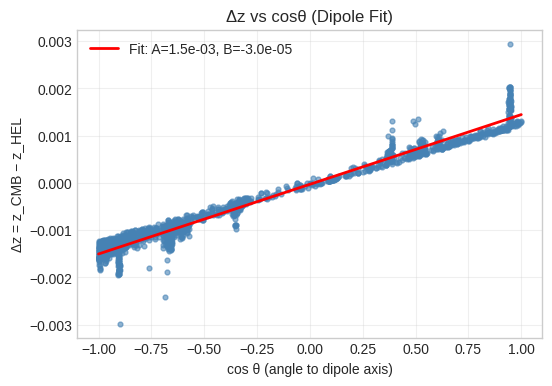

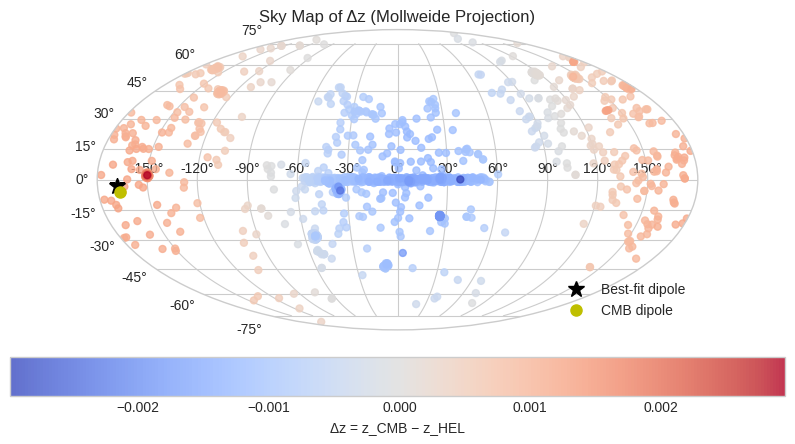

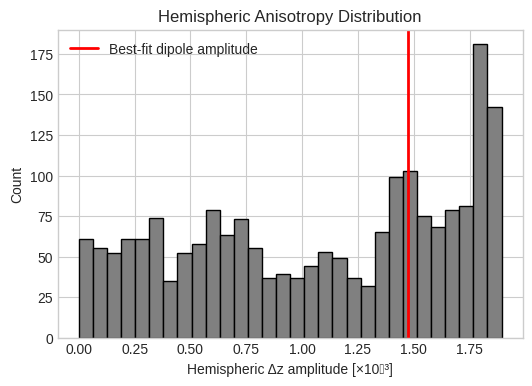


All dipole and sky map figures saved:
  fig_dz_vs_costheta.png
  fig_sky_dz_mollweide.png
  fig_hemispheric_asymmetry.png


In [6]:
# ===========================================================
#  DIRECTIONAL ANALYSIS: Dipole & Sky Map of Δz_CMB−HEL
# ===========================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

plt.style.use("seaborn-v0_8-whitegrid")

# Load deduplicated Pantheon+ data
data = pd.read_csv("Pantheon_SH0ES_data.csv").drop_duplicates(subset=["CID"], keep="first")
data["dz_CMB_HEL"] = data["zCMB"] - data["zHEL"]

# Convert RA, DEC to radians
ra = np.deg2rad(data["RA"].values)
dec = np.deg2rad(data["DEC"].values)
dz = data["dz_CMB_HEL"].values

# -----------------------------------------------------------
# 1. Define dipole model and fitting function
# -----------------------------------------------------------
def dipole_model(params, ra, dec):
    """Return predicted Δz for given dipole amplitude and direction."""
    A, ra0, dec0, B = params
    cos_theta = (np.sin(dec) * np.sin(dec0) +
                 np.cos(dec) * np.cos(dec0) * np.cos(ra - ra0))
    return A * cos_theta + B

def chi2_dipole(params, ra, dec, dz):
    model = dipole_model(params, ra, dec)
    return np.sum((dz - model)**2)

# Initial guess: small amplitude, direction near CMB dipole (RA=167°, Dec=-6°)
initial = [1e-3, np.deg2rad(167.0), np.deg2rad(-6.0), 0.0]
result = minimize(chi2_dipole, initial, args=(ra, dec, dz),
                  bounds=[(0, 0.01), (0, 2*np.pi), (-np.pi/2, np.pi/2), (-0.01, 0.01)],
                  method="L-BFGS-B")

A_best, ra_best, dec_best, B_best = result.x
print(f"Dipole amplitude A = {A_best:.3e}, monopole B = {B_best:.3e}")
print(f"Best-fit direction: RA={np.rad2deg(ra_best):.1f}°, Dec={np.rad2deg(dec_best):.1f}°")

# -----------------------------------------------------------
# 2. Δz vs cosθ relative to dipole direction
# -----------------------------------------------------------
cos_theta = (np.sin(dec) * np.sin(dec_best) +
             np.cos(dec) * np.cos(dec_best) * np.cos(ra - ra_best))
plt.figure(figsize=(6, 4))
plt.scatter(cos_theta, dz, s=12, alpha=0.6, color="steelblue")
plt.plot(np.linspace(-1, 1, 100),
         A_best * np.linspace(-1, 1, 100) + B_best, "r-", lw=2,
         label=f"Fit: A={A_best:.1e}, B={B_best:.1e}")
plt.xlabel("cos θ (angle to dipole axis)")
plt.ylabel("Δz = z_CMB − z_HEL")
plt.title("Δz vs cosθ (Dipole Fit)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig("fig_dz_vs_costheta.png", dpi=300)
plt.show()

# -----------------------------------------------------------
# 3. Mollweide sky map of Δz
# -----------------------------------------------------------
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection="mollweide")

# Convert RA to longitude in radians for Mollweide
ra_wrap = np.remainder(ra + 2*np.pi, 2*np.pi)
ra_wrap[ra_wrap > np.pi] -= 2*np.pi
sc = ax.scatter(-ra_wrap, dec, c=dz, cmap="coolwarm", s=25, alpha=0.8)
cb = plt.colorbar(sc, orientation="horizontal", pad=0.07)
cb.set_label("Δz = z_CMB − z_HEL")

# Mark best-fit dipole and CMB dipole
ax.plot(-ra_best, dec_best, "k*", markersize=12, label="Best-fit dipole")
cmb_ra, cmb_dec = np.deg2rad(167.0), np.deg2rad(-6.0)
ax.plot(-cmb_ra, cmb_dec, "yo", markersize=8, label="CMB dipole")

ax.grid(True)
ax.legend(loc="lower right")
ax.set_title("Sky Map of Δz (Mollweide Projection)")
plt.savefig("fig_sky_dz_mollweide.png", dpi=300)
plt.show()

# -----------------------------------------------------------
# 4. Hemispheric asymmetry test
# -----------------------------------------------------------
n_trials = 2000
amp_list = []
for i in range(n_trials):
    ra_trial = np.random.uniform(0, 2*np.pi)
    dec_trial = np.random.uniform(-np.pi/2, np.pi/2)
    cos_t = (np.sin(dec) * np.sin(dec_trial) +
             np.cos(dec) * np.cos(dec_trial) * np.cos(ra - ra_trial))
    mask_plus = cos_t > 0
    mask_minus = cos_t < 0
    if mask_plus.sum() > 5 and mask_minus.sum() > 5:
        amp = dz[mask_plus].mean() - dz[mask_minus].mean()
        amp_list.append(abs(amp))
amp_list = np.array(amp_list)
plt.figure(figsize=(6,4))
plt.hist(amp_list*1e3, bins=30, color="gray", edgecolor="black")
plt.axvline(A_best*1e3, color="red", lw=2, label="Best-fit dipole amplitude")
plt.xlabel("Hemispheric Δz amplitude [×10⁻³]")
plt.ylabel("Count")
plt.legend()
plt.title("Hemispheric Anisotropy Distribution")
plt.savefig("fig_hemispheric_asymmetry.png", dpi=300)
plt.show()

print("\nAll dipole and sky map figures saved:")
print("  fig_dz_vs_costheta.png")
print("  fig_sky_dz_mollweide.png")
print("  fig_hemispheric_asymmetry.png")


In [ ]:
# === Rebuild MU_corr from original Pantheon_SH0ES_data.csv ===
import numpy as np
import pandas as pd

# -----------------------------
# Config
# -----------------------------
# Dipole parameters (your measurement)
V_RES_KM_S = 444.0
RA_DIP_DEG  = 168.4
DEC_DIP_DEG = -3.0

# Cosmology constants
C_KM_S = 299_792.458

# Low-z taper to avoid 1/z blow-up in Δμ
Z0 = 0.01   # start taper
Z1 = 0.02   # full strength at/above this

# Photometric calibration for distance modulus:
# μ = m_b_corr - M_ref. Choose a Cepheid-calibrated M_ref consistent with H0_ref.
H0_REF = 73.0
M_REF  = -19.253   # typical SH0ES/Pantheon+ calibration tied to H0≈73

# -----------------------------
# 1) Load original file
# -----------------------------
df = pd.read_csv("Pantheon_SH0ES_data.csv")

required = {"RA","DEC","zCMB","m_b_corr","m_b_corr_err_DIAG"}
missing = sorted(list(required - set(df.columns)))
if missing:
    raise ValueError(f"Missing required columns: {missing}")

# -----------------------------
# 2) Geometry and LOS velocity
# -----------------------------
ra = np.deg2rad(df["RA"].to_numpy())
dec = np.deg2rad(df["DEC"].to_numpy())
ra_d = np.deg2rad(RA_DIP_DEG)
dc_d = np.deg2rad(DEC_DIP_DEG)

cos_theta = (
    np.sin(dc_d)*np.sin(dec)
    + np.cos(dc_d)*np.cos(dec)*np.cos(ra - ra_d)
)
v_los = V_RES_KM_S * cos_theta  # km/s

# -----------------------------
# 3) Define μ_base and Δμ with taper
# -----------------------------
m_corr = df["m_b_corr"].to_numpy()
mu_base = m_corr - M_REF

z_obs = df["zCMB"].to_numpy()
z_obs = np.asarray(z_obs, dtype=float)

# Taper weight w(z): 0 for z<=Z0, linear to 1 at Z1, 1 above Z1
w = np.zeros_like(z_obs)
mid = (z_obs > Z0) & (z_obs < Z1)
w[mid] = (z_obs[mid] - Z0) / (Z1 - Z0)
w[z_obs >= Z1] = 1.0

# Safe denominator: use actual z where valid, else hold at Z1 during ramp
z_for_mu = np.where(mid, Z1, np.maximum(z_obs, Z1))
# Δμ = -(5/ln10)*(v_los / (c z)) * w
delta_mu = -(5.0/np.log(10.0)) * (v_los / (C_KM_S * z_for_mu)) * w

mu_corr = mu_base + delta_mu

# -----------------------------
# 4) Optional: pv-corrected redshift to include alongside MU_corr
#     z_pv = z_obs - w * (v_los / c)  (first-order)
# -----------------------------
z_pv = z_obs - w*(v_los / C_KM_S)
z_pv = np.clip(z_pv, 1e-4, None)  # avoid zero/negative

# -----------------------------
# 5) Diagnostics
# -----------------------------
abs_dm = np.abs(delta_mu[w>0])
mean_abs = float(abs_dm.mean()) if abs_dm.size else 0.0
rng = (float(delta_mu.min()), float(delta_mu.max()))
frac_big = float(np.mean(np.abs(delta_mu) > 0.05))  # fraction with |Δμ| > 0.05 mag

print("Rebuilt MU_corr with dipole Δμ and low-z taper:")
print(f"  v_res = {V_RES_KM_S:.1f} km/s, axis RA={RA_DIP_DEG:.1f}°, Dec={DEC_DIP_DEG:.1f}°")
print(f"  M_ref = {M_REF:.3f} (for H0_ref={H0_REF:.1f})")
print(f"  Taper: w=0 for z≤{Z0}, linear to 1 by z≥{Z1}")
print(f"  Mean |Δμ| where w>0  = {mean_abs:.4f} mag")
print(f"  Δμ range             = ({rng[0]:.3f}, {rng[1]:.3f}) mag")
print(f"  frac(|Δμ|>0.05 mag)  = {100*frac_big:.1f}%")

# -----------------------------
# 6) Write corrected file
# -----------------------------
out = df.copy()
out["MU_corr"] = mu_corr
out["z_pv"]    = z_pv
out.to_csv("Pantheon_SH0ES_data_corrected.csv", index=False)
print("Saved -> Pantheon_SH0ES_data_corrected.csv")


Rebuilt MU_corr with dipole Δμ and low-z taper:
  v_res = 444.0 km/s, axis RA=168.4°, Dec=-3.0°
  M_ref = -19.253 (for H0_ref=73.0)
  Taper: w=0 for z≤0.01, linear to 1 by z≥0.02
  Mean |Δμ| where w>0  = 0.0288 mag
  Δμ range             = (-0.155, 0.147) mag
  frac(|Δμ|>0.05 mag)  = 20.5%
Saved -> Pantheon_SH0ES_data_corrected.csv
